In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

dataset_path = os.path.abspath(os.path.join("..", "dataset"))

In [2]:
train_path = os.path.join(dataset_path, "train.csv")
test_path = os.path.join(dataset_path, "test.csv")

In [3]:
train = pd.read_csv(train_path).set_index("id")
train

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19


In [4]:
train.columns

Index(['road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')

In [5]:
train.corr(numeric_only=True).sort_values(by="accident_risk", ascending=False)

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk
accident_risk,-0.006003,0.543946,0.430898,0.000629,0.031032,0.051129,-0.000977,0.213891,1.000000
curvature,-0.020245,1.000000,0.008399,0.017168,0.048220,0.063931,-0.004502,0.145034,0.543946
speed_limit,0.001194,0.008399,1.000000,-0.004461,0.011497,0.010992,0.004392,0.031373,0.430898
num_reported_accidents,0.017662,0.145034,0.031373,-0.000162,-0.007026,-0.015053,0.003962,1.000000,0.213891
holiday,0.002544,0.063931,0.010992,-0.003813,-0.007920,1.000000,-0.001514,-0.015053,0.051129
public_road,-0.002041,0.048220,0.011497,0.003828,1.000000,-0.007920,0.004117,-0.007026,0.031032
road_signs_present,-0.000498,0.017168,-0.004461,1.000000,0.003828,-0.003813,0.002287,-0.000162,0.000629
school_season,-0.001081,-0.004502,0.004392,0.002287,0.004117,-0.001514,1.000000,0.003962,-0.000977
num_lanes,1.000000,-0.020245,0.001194,-0.000498,-0.002041,0.002544,-0.001081,0.017662,-0.006003


In [6]:
train.describe()

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,7.000000,1.000000


[0.13 0.35 0.3  0.21 0.56 0.61 0.2  0.16 0.18 0.15 0.06 0.32 0.37 0.28
 0.17 0.39 0.23 0.51 0.63 0.79 0.34 0.29 0.68 0.4  0.24 0.33 0.41 0.38
 0.   0.47 0.31 0.26 0.19 0.44 0.49 0.73 0.07 0.57 0.48 0.12 0.5  0.52
 0.25 0.6  0.11 0.58 0.46 0.59 0.22 0.36 0.42 0.43 0.84 0.45 0.64 0.27
 0.54 0.14 0.53 0.77 0.05 0.69 0.1  0.8  0.55 0.08 0.04 0.09 0.02 0.78
 0.81 0.71 0.92 0.62 0.82 0.65 0.75 0.72 0.66 0.67 0.74 0.01 0.88 0.87
 0.7  0.86 0.03 0.76 0.83 1.   0.91 0.85 0.94 0.97 0.89 0.93 0.9  0.96] number of distinct values: 98


<Axes: >

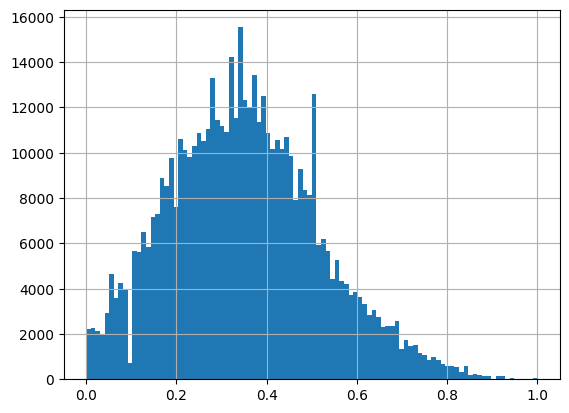

In [7]:
target = train.accident_risk
print(target.unique(), f"number of distinct values: {target.nunique()}")
target.hist(bins=target.nunique())

In [8]:
# categorical columns
cat_cols = train.select_dtypes(include="object").columns.tolist()
bool_cols = [c for c in train.columns if train[c].dtype == "bool"]
num_cols = train.select_dtypes(include=["int64","float64"]).columns.tolist()
num_cols.remove("accident_risk")  # keep target separate if present

# show top value counts for each categorical
for c in cat_cols + bool_cols:
    print(f"\nColumn: {c}")
    print(train[c].value_counts(dropna=False).head(20))


Column: road_type
road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64

Column: lighting
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64

Column: weather
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64

Column: time_of_day
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64

Column: road_signs_present
road_signs_present
False    259289
True     258465
Name: count, dtype: int64

Column: public_road
public_road
True     260045
False    257709
Name: count, dtype: int64

Column: holiday
holiday
True     260688
False    257066
Name: count, dtype: int64

Column: school_season
school_season
False    260164
True     257590
Name: count, dtype: int64


In [9]:
num_cols = train.select_dtypes(include=["int64","float64"]).columns.tolist()
if "accident_risk" in num_cols:
    num_cols.remove("accident_risk")

discrete_cols = ["num_lanes", "speed_limit", "num_reported_accidents"]
continuous_cols = [c for c in num_cols if c not in discrete_cols]
print("Discrete cols:", discrete_cols)
print("Continuous cols:", continuous_cols)

Discrete cols: ['num_lanes', 'speed_limit', 'num_reported_accidents']
Continuous cols: ['curvature']
